## Setup

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
dataset_path = '/kaggle/input/psychiatric-drug-webmd-reviews/'

reviews_file = dataset_path + 'psychiatric_drug_webmd_reviews.csv'
df = pd.read_csv(reviews_file, index_col=0)

col_descripts_file = dataset_path + 'column_descriptions.csv'
col_descripts = pd.read_csv(col_descripts_file)

drug_file = dataset_path + 'drug_list.csv'
drugs = pd.read_csv(drug_file)

In [3]:
# description of columns

from pandas import option_context
from IPython.display import display

with option_context('display.max_colwidth', None, 'display.colheader_justify', 'left'):
    to_display = col_descripts.style.set_properties(**{'text-align': 'left'})
    display(to_display)

,column_name,description
0,drug_name,Name of medication being reviewed
1,date,Date of review
2,age,"Age group of patient, selected from a dropdown list"
3,gender,"Gender of patient, selected from a dropdown list"
4,time_on_drug,"How long the medication has been taken, selected from a dropdown list"
5,reviewer_type,"The type of person reviewing, patient or caregiver"
6,condition,"The ""main reason for taking this medication,"" selected from a dropdown list"
7,rating_overall,"Overall rating for the drug, the average of rating_effectiveness, rating_ease_of_use, and rating_satisfaction, from 1 to 5"
8,rating_effectiveness,"Agreement with the statement ""This drug has worked for me,"" from 1 to 5 stars"
9,rating_ease_of_use,"Agreement with the statement ""This medication has been easy for me to use,"" from 1 to 5 stars"


In [4]:
# total number of reviews available
len(df)

62530

In [5]:
# example of some of the records in the dataset
df.head(5)

,drug_name,date,age,gender,time_on_drug,reviewer_type,condition,rating_overall,rating_effectiveness,rating_ease_of_use,rating_satisfaction,text
0,Sertraline Oral,2/25/2024,35-44,Female,NaN,Patient,Depressed Mood Disorder Occurring Every Year a...,1.0,1,1,1,I have depression that's a lot worse in winter...
1,Sertraline Oral,2/8/2024,45-54,Female,1 to 6 months,Patient,Anxiousness associated with Depression,4.7,5,4,5,Started Sertraline after having the worst year...
2,Sertraline Oral,2/7/2024,45-54,Male,1 to 6 months,Patient,Depression,1.7,1,3,1,Had a nervous breakdown along with diagnosed w...
3,Sertraline Oral,1/31/2024,25-34,Female,1 to less than 2 years,Patient,Anxiousness associated with Depression,3.7,4,3,4,I have been on Sertraline for a year. My life ...
4,Sertraline Oral,1/15/2024,35-44,Male,1 to 6 months,Patient,Depression,1.7,1,3,1,The use of this drug has now destroyed my life...


In [6]:
# medications included in the dataset and links to their reviews

with option_context('display.max_colwidth', None, 'display.colheader_justify', 'left'):
    to_display = drugs.style.set_properties(**{'text-align': 'left'})
    display(to_display)

,drug_name,url
0,Abilify Oral,https://reviews.webmd.com/drugs/drugreview-64439-abilify
1,Doxepin Oral,https://reviews.webmd.com/drugs/drugreview-8647-doxepin-hcl-concentrate
2,Clomipramine Oral,https://reviews.webmd.com/drugs/drugreview-1305-clomipramine-hcl
3,Aplenzin Oral,https://reviews.webmd.com/drugs/drugreview-151973-aplenzin
4,Asendin Oral,https://reviews.webmd.com/drugs/drugreview-6171-asendin-tablet
5,Aventyl Oral,https://reviews.webmd.com/drugs/drugreview-6172-aventyl-capsule
6,Brexpiprazole Oral,https://reviews.webmd.com/drugs/drugreview-169290-brexpiprazole-tablet
7,Caplyta Oral,https://reviews.webmd.com/drugs/drugreview-178621-caplyta
8,Citalopram Oral,https://reviews.webmd.com/drugs/drugreview-1701-citalopram-hbr
9,Cymbalta Oral,https://reviews.webmd.com/drugs/drugreview-91491-cymbalta


In [7]:
# possible values for reviewer type: patient, caregiver, or empty
for x in pd.unique(df['reviewer_type']):
    print(x)

Patient
nan
Caregiver


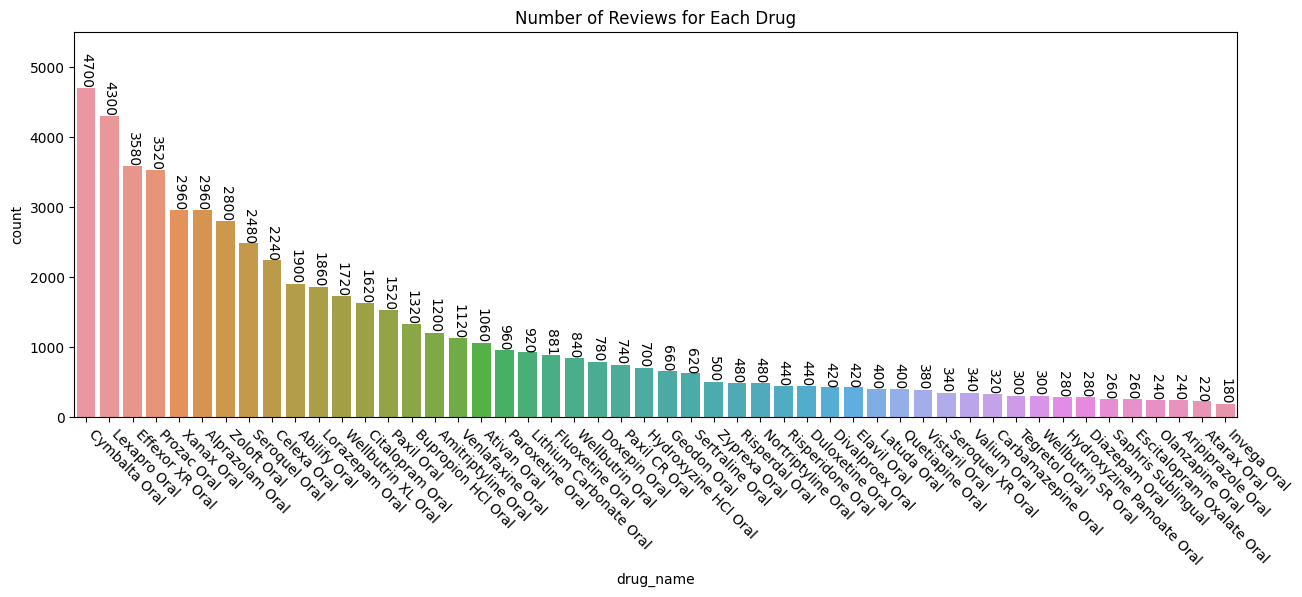

In [8]:
# count number of reviews for each drug - plot only the top n
fig, ax = plt.subplots(figsize=(15, 5))
n_top = 50
order = df['drug_name'].value_counts(ascending=False)[:50]
sns.countplot(df, x='drug_name', order=order.index)
plt.xticks(rotation=-45, ha='left')
ax.bar_label(container=ax.containers[0], labels=order, rotation=-90)
plt.title('Number of Reviews for Each Drug')
plt.ylim(0, 5500);

In [9]:
# number of drugs with at least n reviews
counts = df['drug_name'].value_counts()
print(f'{np.sum(counts >= 100)} drugs with at least 100 reviews')
print(f'{np.sum(counts >= 50)} drugs with at least 50 reviews')

64 drugs with at least 100 reviews
83 drugs with at least 50 reviews


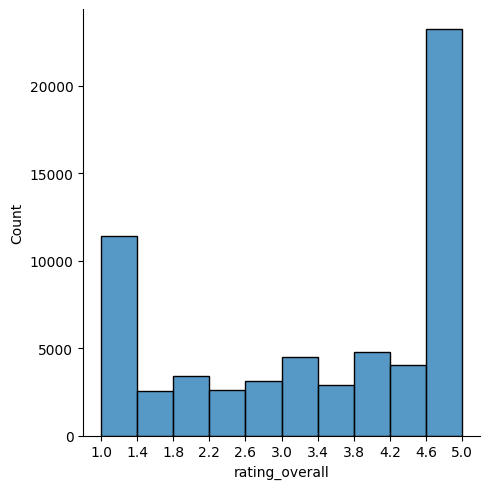

In [10]:
bins = 10
bin_width = (5-1)/bins
ax = sns.displot(df, x='rating_overall', bins=bins)
plt.xticks(np.arange(1, 5+bin_width, bin_width));

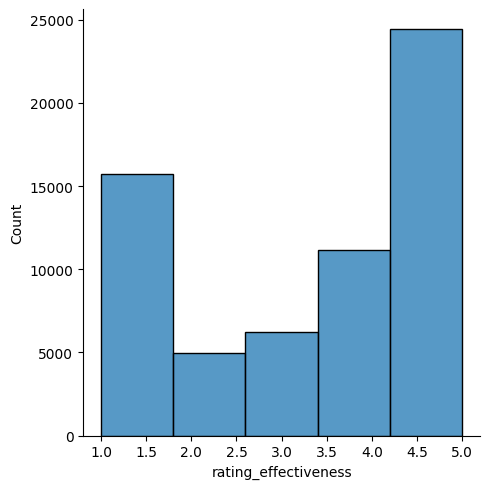

In [11]:
sns.displot(df, x='rating_effectiveness', bins=5);

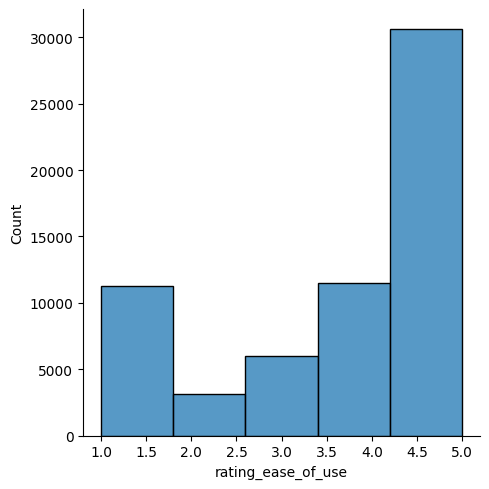

In [12]:
sns.displot(df, x='rating_ease_of_use', bins=5);

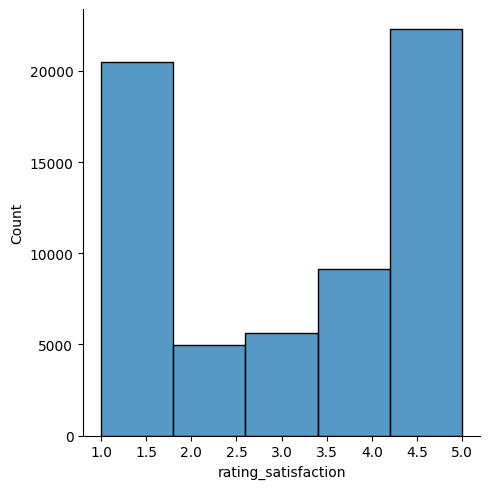

In [13]:
sns.displot(df, x='rating_satisfaction', bins=5)

<Axes: xlabel='age', ylabel='count'>

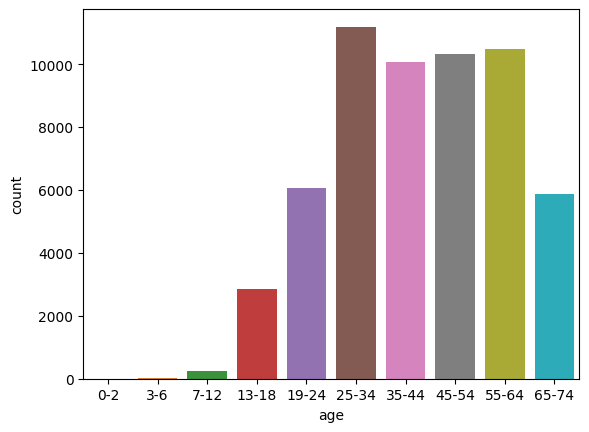

In [14]:
vals = np.array([x for x in pd.unique(df['age']) if type(x)==str])
first_numbers = [int(x.split('-')[0]) for x in vals]
order_inds = np.argsort(first_numbers)
order = vals[order_inds]
sns.countplot(df, x='age', order=order)

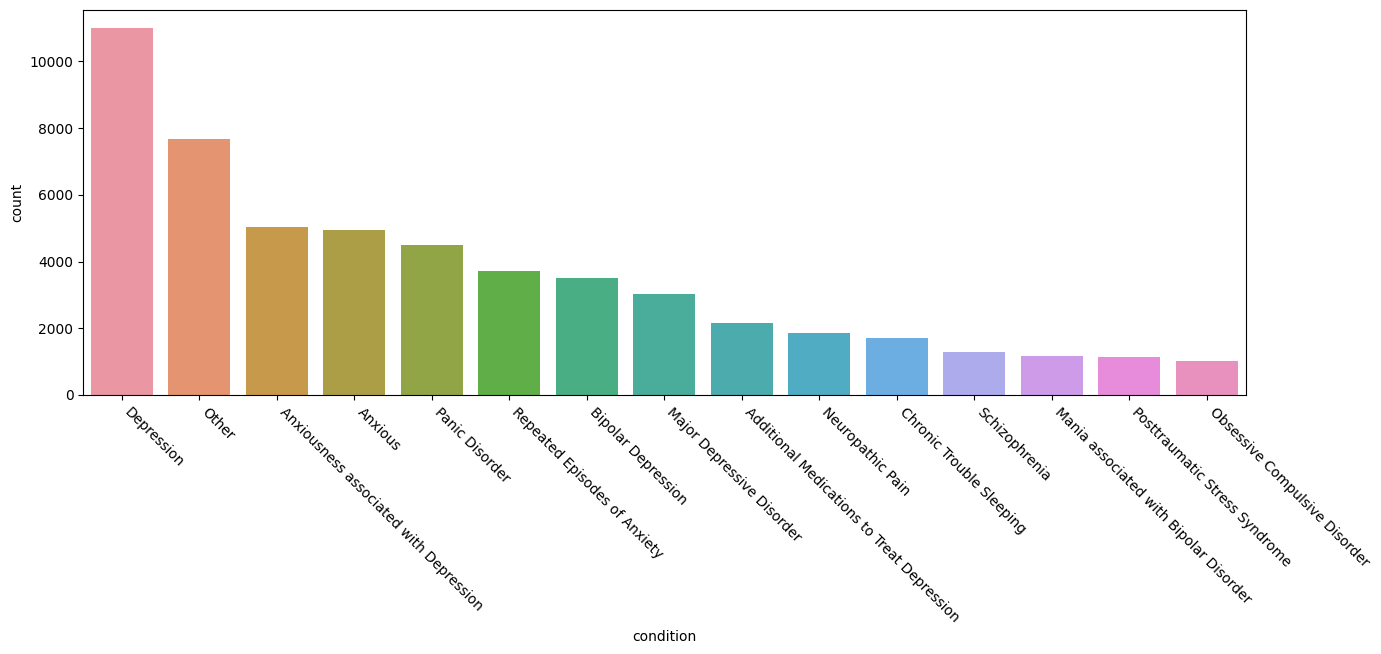

In [15]:
fig, ax = plt.subplots(figsize=(15, 5))
order = df['condition'].value_counts(ascending=False)
top_n = 15
top_conds = order[:top_n].index
sns.countplot(df[[x in top_conds for x in df['condition']]], x='condition', order=top_conds)
plt.xticks(rotation=-45, ha='left');

## Suggestions for Data Cleaning

In [16]:
# identify entries with NAs and remove or interpolate values depending on the analysis that you are doing
df.isna().sum()

drug_name                  0
date                       0
age                     5387
gender                  6776
time_on_drug            6918
reviewer_type           2897
condition               1168
rating_overall             0
rating_effectiveness       0
rating_ease_of_use         0
rating_satisfaction        0
text                     933
dtype: int64

In [17]:
# inspect the records where patient is very young
# it is possible that some of these are user input errors
# but there are also entries where age, time on drug, and reviewer type are consistent
df[[x == '0-2' for x in df['age']]]

,drug_name,date,age,gender,time_on_drug,reviewer_type,condition,rating_overall,rating_effectiveness,rating_ease_of_use,rating_satisfaction,text
1829,Haloperidol Lactate Oral,2/27/2009,0-2,Female,1 to 6 months,Patient,Tourette,1.0,1,1,1,my tourettes got worser since then i hav been ...


In [18]:
df[[x == '3-6' for x in df['age']]]

,drug_name,date,age,gender,time_on_drug,reviewer_type,condition,rating_overall,rating_effectiveness,rating_ease_of_use,rating_satisfaction,text
7404,Versed Oral,2/10/2012,3-6,Female,NaN,Caregiver,Calming of Pediatric Patient by Administration...,2.3,4,2,1,My four year old was given this medication for...
7408,Versed Oral,8/23/2010,3-6,Female,less than 1 month,Patient,Calming of Pediatric Patient by Administration...,2.3,2,4,1,My 5 year old was given Versed oral prior to h...
7424,Versed Oral,2/10/2012,3-6,Female,NaN,Caregiver,Calming of Pediatric Patient by Administration...,2.3,4,2,1,My four year old was given this medication for...
7428,Versed Oral,8/23/2010,3-6,Female,less than 1 month,Patient,Calming of Pediatric Patient by Administration...,2.3,2,4,1,My 5 year old was given Versed oral prior to h...
51258,Imipramine Oral,6/27/2017,3-6,Female,1 to 6 months,Caregiver,Other,1.0,1,1,1,My 5 year old daughter is taking this medicati...
51278,Imipramine Oral,6/27/2017,3-6,Female,1 to 6 months,Caregiver,Other,1.0,1,1,1,My 5 year old daughter is taking this medicati...
51298,Imipramine Oral,6/27/2017,3-6,Female,1 to 6 months,Caregiver,Other,1.0,1,1,1,My 5 year old daughter is taking this medicati...
51318,Imipramine Oral,6/27/2017,3-6,Female,1 to 6 months,Caregiver,Other,1.0,1,1,1,My 5 year old daughter is taking this medicati...
51338,Imipramine Oral,6/27/2017,3-6,Female,1 to 6 months,Caregiver,Other,1.0,1,1,1,My 5 year old daughter is taking this medicati...
51358,Imipramine Oral,6/27/2017,3-6,Female,1 to 6 months,Caregiver,Other,1.0,1,1,1,My 5 year old daughter is taking this medicati...


In [19]:
# identify nonsense reviews - for example, discard reviews where > a certain percentage of words are misspelled